In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the CSV file

### Source of the data is https://github.com/square/pysurvival/blob/master/pysurvival/datasets/churn.csv

In [2]:
data = pd.read_csv('churn.csv')


## Having a peek into the dataset

In [3]:
data.head()

product_data_storage product_travel_expense product_payroll  \
0                  2048             Free-Trial          Active   
1                  2048             Free-Trial      Free-Trial   
2                  2048                 Active          Active   
3                   500                 Active      Free-Trial   
4                  5120             Free-Trial          Active   

  product_accounting  csat_score  articles_viewed  \
0                 No           9                4   
1             Active           9                4   
2             Active           9                3   
3                 No          10                0   
4         Free-Trial           8                5   

   smartphone_notifications_viewed  marketing_emails_clicked  \
0                                0                        14   
1                                2                        12   
2                                2                        17   
3                                0                        14   
4                                0                        17   

   social_media_ads_viewed  minutes_customer_support company_size  \
0                        1                       8.3        10-50   
1                        1                       0.0      100-250   
2                        1                       0.0      100-250   
3                        0                       0.0       50-100   
4                        0                       0.0       50-100   

            us_region  months_active  churned  
0  West North Central            3.0      1.0  
1      South Atlantic            2.0      1.0  
2  East South Central            7.0      0.0  
3  East South Central            8.0      1.0  
4  East North Central            7.0      0.0

## List of Columns in the dataset

In [4]:
column_list = list(data.columns)
column_list

['product_data_storage',
 'product_travel_expense',
 'product_payroll',
 'product_accounting',
 'csat_score',
 'articles_viewed',
 'smartphone_notifications_viewed',
 'marketing_emails_clicked',
 'social_media_ads_viewed',
 'minutes_customer_support',
 'company_size',
 'us_region',
 'months_active',
 'churned']

## Summary of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_data_storage             2000 non-null   int64  
 1   product_travel_expense           2000 non-null   object 
 2   product_payroll                  2000 non-null   object 
 3   product_accounting               2000 non-null   object 
 4   csat_score                       2000 non-null   int64  
 5   articles_viewed                  2000 non-null   int64  
 6   smartphone_notifications_viewed  2000 non-null   int64  
 7   marketing_emails_clicked         2000 non-null   int64  
 8   social_media_ads_viewed          2000 non-null   int64  
 9   minutes_customer_support         2000 non-null   float64
 10  company_size                     2000 non-null   object 
 11  us_region                        2000 non-null   object 
 12  months_active       

## Further analysing the columns that are categorial

In [6]:
categorial= [i  for i in data.columns if data[i].dtype==object]

In [7]:
for i in categorial:
    print('Column Name: ',i)
    print(data[i].value_counts())
    print('****************************************')

Column Name:  product_travel_expense
Free-Trial    1608
Active         374
No              18
Name: product_travel_expense, dtype: int64
****************************************
Column Name:  product_payroll
Active        934
Free-Trial    726
No            340
Name: product_payroll, dtype: int64
****************************************
Column Name:  product_accounting
Active        1010
No             503
Free-Trial     487
Name: product_accounting, dtype: int64
****************************************
Column Name:  company_size
10-50            690
50-100           687
1-10             316
100-250          244
self-employed     63
Name: company_size, dtype: int64
****************************************
Column Name:  us_region
Mountain              235
Middle Atlantic       235
New England           234
South Atlantic        225
East South Central    218
Pacific               217
West North Central    217
East North Central    211
West South Central    208
Name: us_region, dtype: int

## Lets See the predictive power score

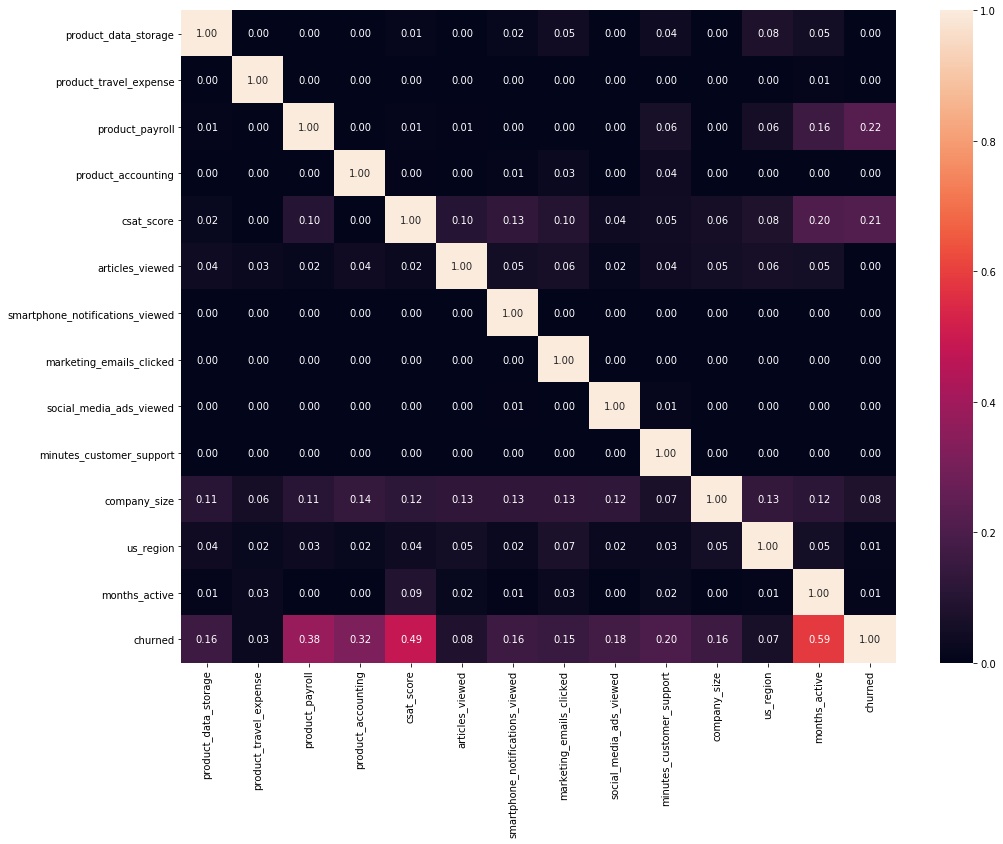

In [8]:
import warnings
warnings.filterwarnings("ignore")
import ppscore as pps
plt.figure(figsize=(16,12))
sns.heatmap(pps.matrix(data),annot=True,fmt=".2f")
plt.show()

##### From above we see that there is no strong correlation among the columns

## Corelation Matrix

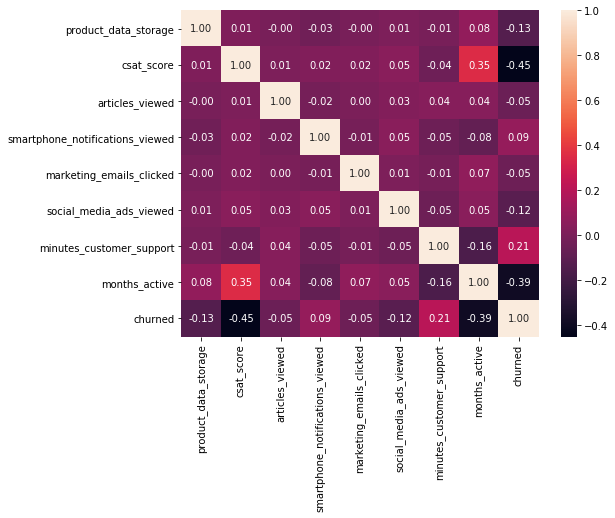

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,fmt=".2f")
plt.show()

#### The corelation matrix also proves that there is no strong correlation among the columns

## Vizualizing the Churned Column

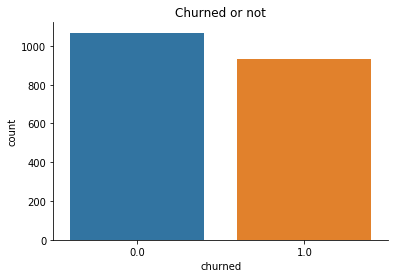

In [10]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
sns.countplot(data['churned'])
plt.title('Churned or not')

plt.show()

## Lets further analyse the churned column 

In [11]:
no_of_observations = len(data)
(data.groupby('churned').count()/no_of_observations)

product_data_storage  product_travel_expense  product_payroll  \
churned                                                                  
0.0                     0.534                   0.534            0.534   
1.0                     0.466                   0.466            0.466   

         product_accounting  csat_score  articles_viewed  \
churned                                                    
0.0                   0.534       0.534            0.534   
1.0                   0.466       0.466            0.466   

         smartphone_notifications_viewed  marketing_emails_clicked  \
churned                                                              
0.0                                0.534                     0.534   
1.0                                0.466                     0.466   

         social_media_ads_viewed  minutes_customer_support  company_size  \
churned                                                                    
0.0                        0.534                     0.534         0.534   
1.0                        0.466                     0.466         0.466   

         us_region  months_active  
churned                            
0.0          0.534          0.534  
1.0          0.466          0.466

### This shows that the percentage off people who left the company after the lifetime T is 53.4% which is also equal to the right censored data

#### The best correlation is between months_active and churned so let us analyse them

In [12]:
data[data['months_active'] > 4]

product_data_storage product_travel_expense product_payroll  \
2                     2048                 Active          Active   
3                      500                 Active      Free-Trial   
4                     5120             Free-Trial          Active   
12                     500             Free-Trial          Active   
13                    2048             Free-Trial      Free-Trial   
...                    ...                    ...             ...   
1978                  1024                 Active          Active   
1988                  2048             Free-Trial          Active   
1990                  5120             Free-Trial      Free-Trial   
1993                  2048             Free-Trial          Active   
1995                  1024             Free-Trial          Active   

     product_accounting  csat_score  articles_viewed  \
2                Active           9                3   
3                    No          10                0   
4            Free-Trial           8                5   
12               Active          10                4   
13               Active          10                5   
...                 ...         ...              ...   
1978         Free-Trial           9                2   
1988             Active           9                3   
1990             Active           9                4   
1993             Active          10                5   
1995         Free-Trial           9                3   

      smartphone_notifications_viewed  marketing_emails_clicked  \
2                                   2                        17   
3                                   0                        14   
4                                   0                        17   
12                                  1                        21   
13                                  0                        18   
...                               ...                       ...   
1978                                0                        20   
1988                                0                        12   
1990                                0                        14   
1993                                0                        16   
1995                                0                        19   

      social_media_ads_viewed  minutes_customer_support company_size  \
2                           1                       0.0      100-250   
3                           0                       0.0       50-100   
4                           0                       0.0       50-100   
12                          0                       0.0       50-100   
13                          0                       0.0         1-10   
...                       ...                       ...          ...   
1978                        0                       0.0         1-10   
1988                        0                      12.2       50-100   
1990                        1                       0.0       50-100   
1993                        0                       0.0       50-100   
1995                        1                       0.4       50-100   

               us_region  months_active  churned  
2     East South Central            7.0      0.0  
3     East South Central            8.0      1.0  
4     East North Central            7.0      0.0  
12    West South Central            5.0      0.0  
13    West South Central            5.0      0.0  
...                  ...            ...      ...  
1978  West North Central            7.0      0.0  
1988         New England            5.0      1.0  
1990            Mountain            5.0      0.0  
1993         New England            8.0      0.0  
1995            Mountain            8.0      0.0  

[588 rows x 14 columns]

## Visual Analysis of the months_active column

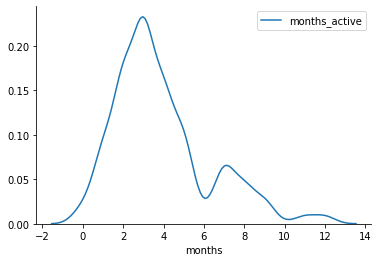

In [13]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
sns.kdeplot(data= data['months_active'])
plt.xlabel('months')
plt.show()

#### The pdf rises to max between 2 to 4 months and the density is more between 0 to 6 months

## Visual Analysis of the csat_score column

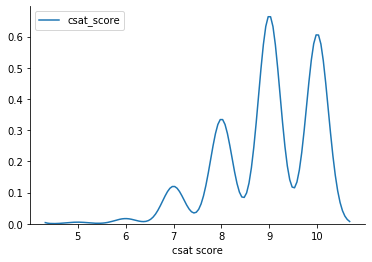

In [25]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
sns.kdeplot(data= data['csat_score'])
plt.xlabel('csat score')
plt.show()

#### The pdf rises to max between 8.5 to 9.5  and the density is more between 8.5 to 10.5 csat score 

## Vizualizing the product_travel_expense column

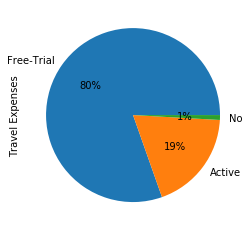

In [22]:
data['product_travel_expense'].value_counts().plot(kind='pie',  autopct='%1.0f%%')
plt.ylabel("Travel Expenses")
plt.show()

#### The free trial has a larger share in the product travel expenses

## Vizualizing the product_data_storage column

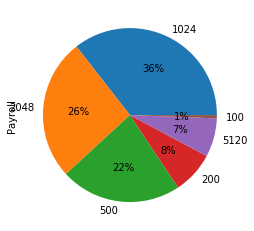

In [71]:
data['product_data_storage'].value_counts().plot(kind='pie',  autopct='%1.0f%%')
plt.ylabel("Data Storage")
plt.show()

#### The data storage is dominated by 1024

## Vizualizing the product_payroll column

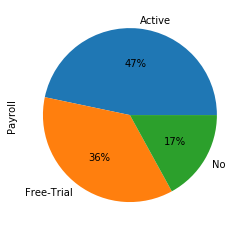

In [31]:
data['product_payroll'].value_counts().plot(kind='pie',  autopct='%1.0f%%')
plt.ylabel("Payroll")
plt.show()

#### The share of Active customers is more in the product payroll.

## Vizualizing the product_accounting column

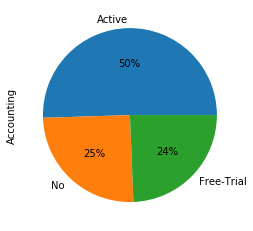

In [26]:
data['product_accounting'].value_counts().plot(kind='pie',  autopct='%1.0f%%')
plt.ylabel("Accounting")
plt.show()

#### Again we see that the Active Users dominate in the payroll accounting

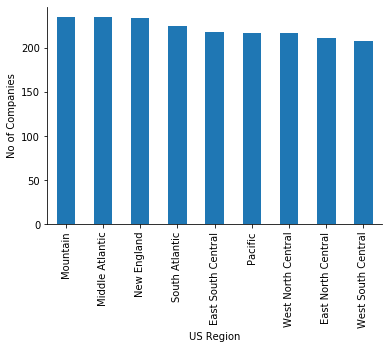

In [38]:
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
data['us_region'].value_counts().plot(kind='bar')
plt.ylabel("No of Companies")
plt.xlabel("US Region")
plt.show()

## Analysing the four marketing schemes by the companies and how much the customers interacted with them

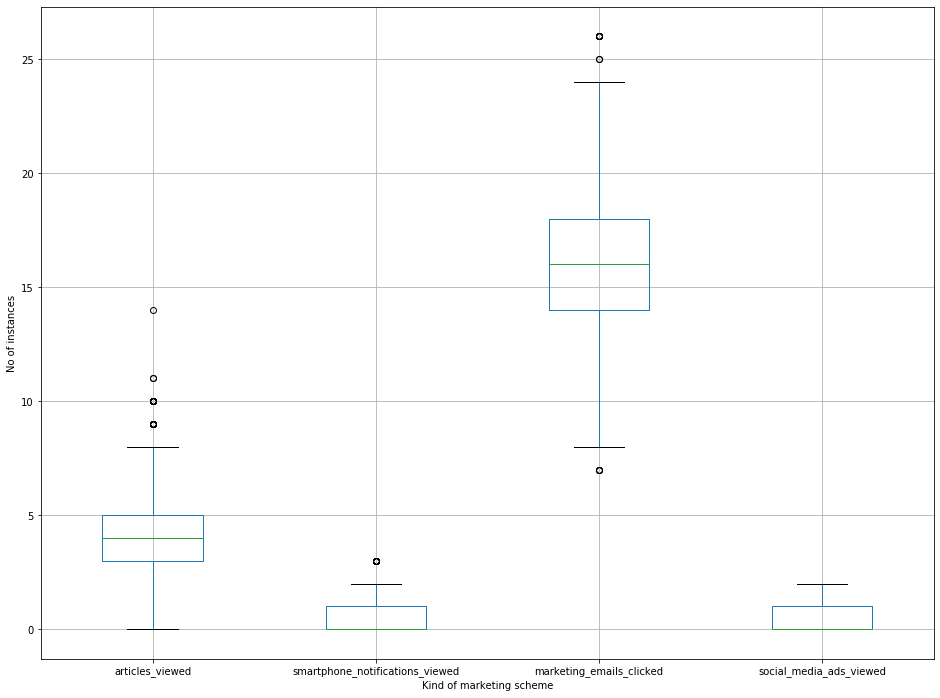

In [41]:
plt.figure(figsize=(16,12))
data.boxplot(column = ['articles_viewed','smartphone_notifications_viewed','marketing_emails_clicked','social_media_ads_viewed'])
plt.ylabel('No of instances')
plt.xlabel('Kind of marketing scheme')
plt.show()


## Pairplot among the columns of our dataset

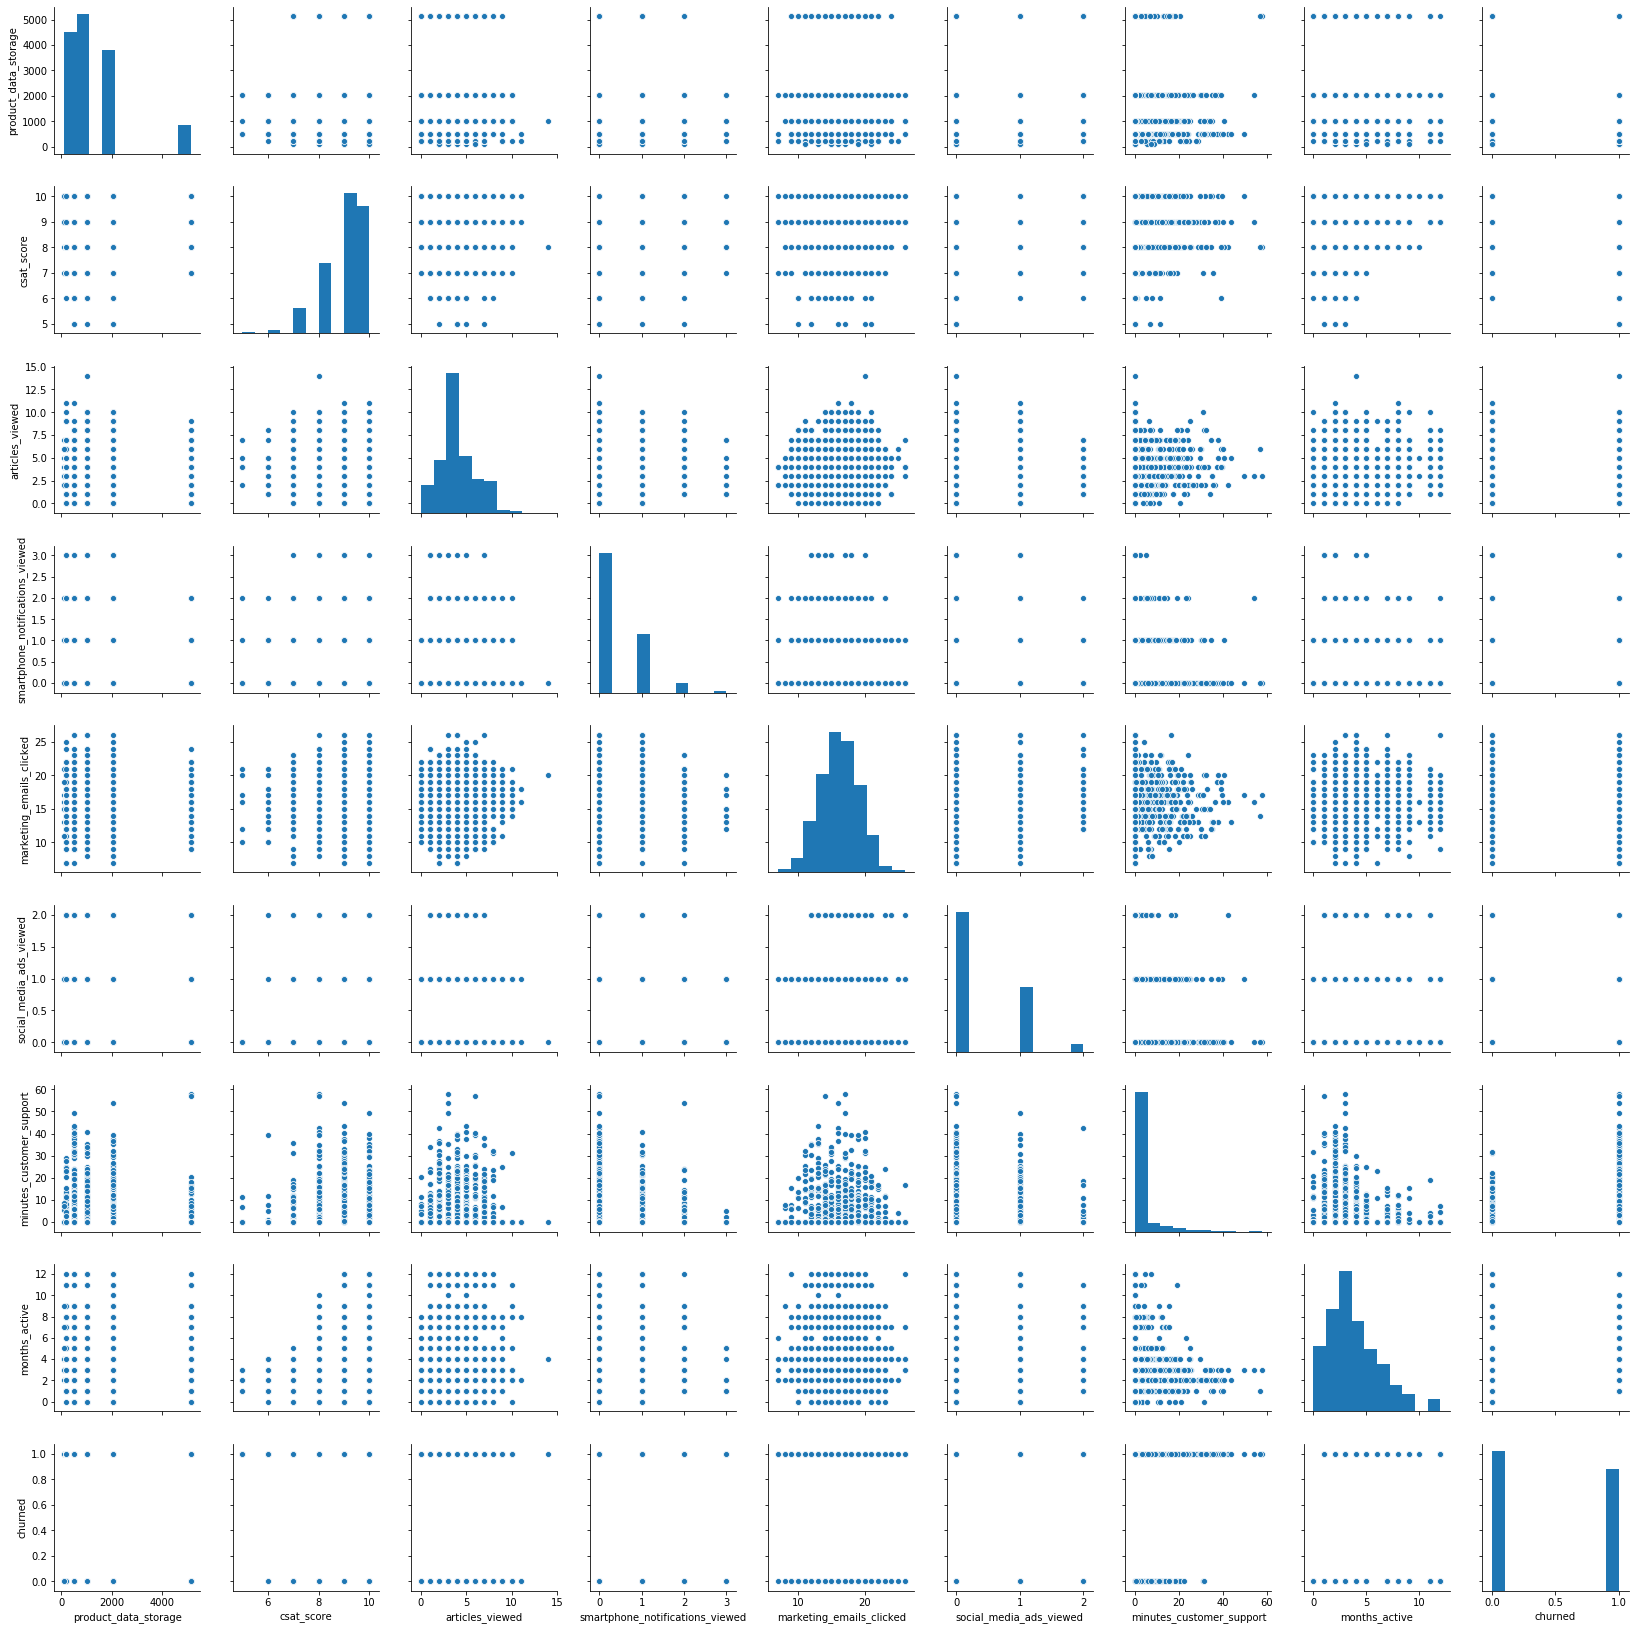

In [43]:
sns.pairplot(data)
plt.show()

## A jointplot wise analysis of the months_active and csat_score

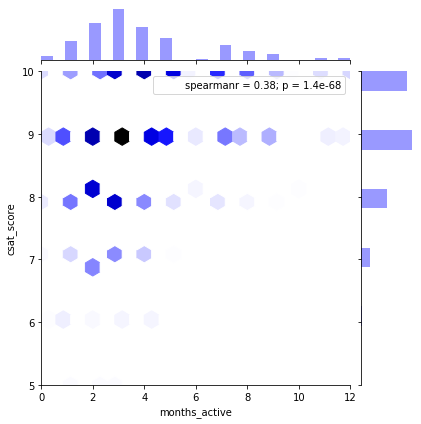

In [44]:
from scipy.stats import spearmanr
sns.jointplot(x='months_active',y='csat_score',data=data,kind='hex',color='blue',stat_func=spearmanr)

####  We see that although it is one of the stongest correlation in our dataset it is not that stongly correlated

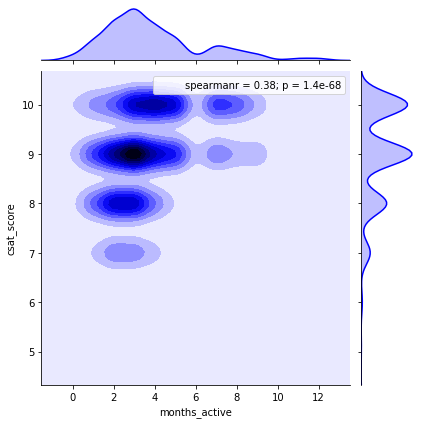

In [47]:
sns.jointplot(x='months_active',y='csat_score',data=data,kind='kde',color='blue',stat_func=spearmanr)
plt.show()

#### Correlations are not that strong but still worth a look

## Histogram between churned and months active

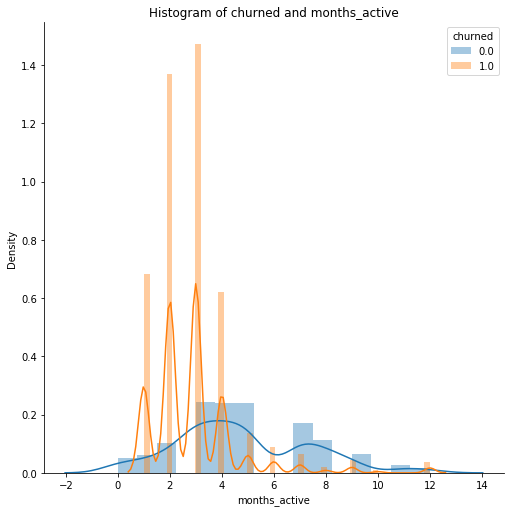

In [73]:
sns.FacetGrid(data, hue = "churned", size = 7).map(sns.distplot, "months_active")
plt.title("Histogram of churned and months_active")
plt.ylabel("Density")
plt.legend(title="churned")
plt.show()

#### The churning probability density is highest between 1.5 and 2.5 months while the not churning density is highest betweeb 2 and 6 months and we can see that the churning density reaches much higher values as compared with non churning

## Histogram between churned and Customer Satisfaction Score

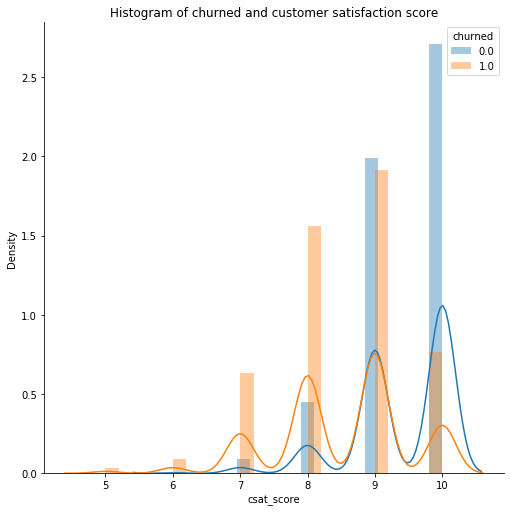

In [75]:
sns.FacetGrid(data, hue = "churned", size = 7).map(sns.distplot, "csat_score")
plt.title("Histogram of churned and customer satisfaction score")
plt.ylabel("Density")
plt.legend(title="churned")
plt.show()

#### The highest churned density us between 8.5 and 9.5 csat score while the highest non churned density is around the score of 10 which was kind of expected 

## Kaplan Meier Curve for the dataset

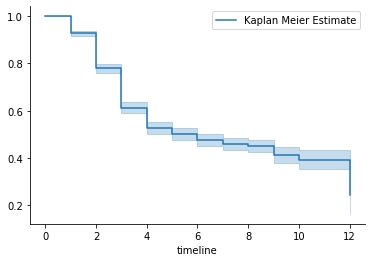

In [79]:
from lifelines import KaplanMeierFitter
fig, ax = plt.subplots()

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False) 
time = data['months_active']

event = data['churned']  
kmf = KaplanMeierFitter() 
kmf.fit(time, event,label='Kaplan Meier Estimate')
kmf.plot()

plt.show()
